In [1]:
import json
from glob import glob
paths = glob("C:\\Users\\vince\\Desktop\\DataScience Project repo\\data\\transcripts\\gcstt\\raw\\2019-10-30\\*.txt")

This page is used to display the statistic of Total charge for each podcasts

In [3]:
lengthArray = []
for path in paths:
    with open(path,"r") as file:
        data = file.read()
        jsonFile = json.loads(data)
        lengthArray.append([jsonFile["Stats"]["PodcastID"],jsonFile["Stats"]["AudioLength"],jsonFile["Stats"]["AudioLength"]/15*0.006])

In [4]:
import pandas as pd
df = pd.DataFrame(lengthArray)

In [5]:
df.columns = ["ID","Audio Length","Total Charge"]

In [6]:
df

,ID,Audio Length,Total Charge
0,1012570406.mp3,3608.607347,1.443443
1,1028908750.mp3,2665.776750,1.066311
2,1042368254.mp3,2792.620256,1.117048
3,1043699613.mp3,7423.346938,2.969339
4,1044196249.mp3,2458.774500,0.983510
...,...,...,...
128,929121341.mp3,4805.744000,1.922298
129,944925529.mp3,4130.435878,1.652174
130,953290300.mp3,1221.002063,0.488401
131,978052928.mp3,2245.119969,0.898048


In [7]:
import matplotlib.pyplot as plt
import numpy as np
colors = (0,0,0)

Line Graph

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


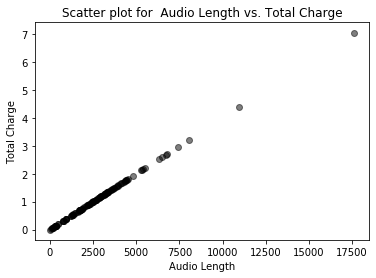

In [8]:
plt.scatter(df["Audio Length"], df["Total Charge"], c=colors, alpha=0.5)
plt.title("Scatter plot for  Audio Length vs. Total Charge")
plt.xlabel("Audio Length")
plt.ylabel("Total Charge")
plt.show()

Mean For each columns

In [9]:
print("Total Charge Mean:"+str(np.mean(df["Total Charge"])))

Total Charge Mean:1.1029031027909777


Variance for each columns

In [10]:
print("Total Charge Variance:" + str(np.var(df["Total Charge"])))

Total Charge Variance:0.7774177286587396


Median

In [11]:
print("Total Charge Median:" + str(np.median(df["Total Charge"])))

Total Charge Median:1.0134778624


Standard Deviation

In [12]:
print("Total Charge std:" + str(np.std(df["Total Charge"])))

Total Charge std:0.8817129513955999


Measures of Spread

In [13]:
print("Audio Length MOS:"+ str(max(df["Audio Length"])-min(df["Audio Length"])))

Audio Length MOS:17623.0145


In [14]:
print("Total Charge MOS:" + str(max(df["Total Charge"])-min(df["Total Charge"])))

Total Charge MOS:7.049205800000001


Quartile focus on total charge

In [15]:
df["Total Charge"].describe()

count    133.000000
mean       1.102903
std        0.885046
min        0.000000
25%        0.574004
50%        1.013478
75%        1.370843
max        7.049206
Name: Total Charge, dtype: float64

Interquartile (IQR)

In [16]:
df["Total Charge"].quantile(0.75) - df["Total Charge"].quantile(0.25)

0.7968391644

Ploting distribution

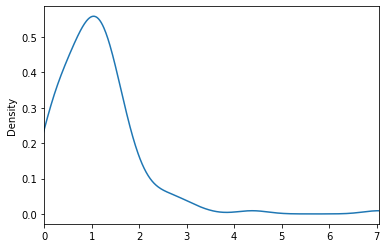

In [17]:
df["Total Charge"].plot(kind="density",xlim=(0,max(df["Total Charge"])))

CDF at 25% quantile

In [18]:
import scipy.stats as stats

In [19]:
stats.uniform.cdf(x=0.535492,loc=0, scale=3)

0.1784973333333333

PPF

In [20]:
stats.uniform.ppf(q=0.25,loc=0, scale = 3)

0.75

PDF

In [21]:
for x in df["Total Charge"]:
    print("Density at x value " + str(x))
    print(stats.uniform.pdf(x, loc=min(df["Total Charge"]),scale = max(df["Total Charge"])))

Density at x value 1.4434429388
0.1418599525069902
Density at x value 1.0663107
0.1418599525069902
Density at x value 1.1170481024
0.1418599525069902
Density at x value 2.9693387752
0.1418599525069902
Density at x value 0.9835098
0.1418599525069902
Density at x value 1.4925954124
0.1418599525069902
Density at x value 0.30279412520000004
0.1418599525069902
Density at x value 1.3190686268
0.1418599525069902
Density at x value 4.3846208
0.1418599525069902
Density at x value 0.5788421024
0.1418599525069902
Density at x value 2.6083727999999997
0.1418599525069902
Density at x value 0.6732904488
0.1418599525069902
Density at x value 0.7593882752000001
0.1418599525069902
Density at x value 1.2734405024
0.1418599525069902
Density at x value 0.7013835752
0.1418599525069902
Density at x value 1.0134778624
0.1418599525069902
Density at x value 0.8769932887999999
0.1418599525069902
Density at x value 0.32221517520000004
0.1418599525069902
Density at x value 0.0663247
0.1418599525069902
Density at 

Histogram

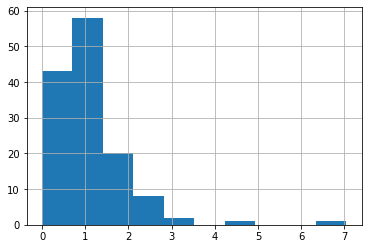

In [22]:
df["Total Charge"].hist()

The above Histogram is skweded to the right

Since MLE has really complicated statiscial model, therefore, we will only use MoM and KDE to display the distribution models

In [23]:
from scipy.stats.distributions import gamma
from scipy.stats import kde
from scipy.optimize import newton
from scipy.special import psi, polygamma

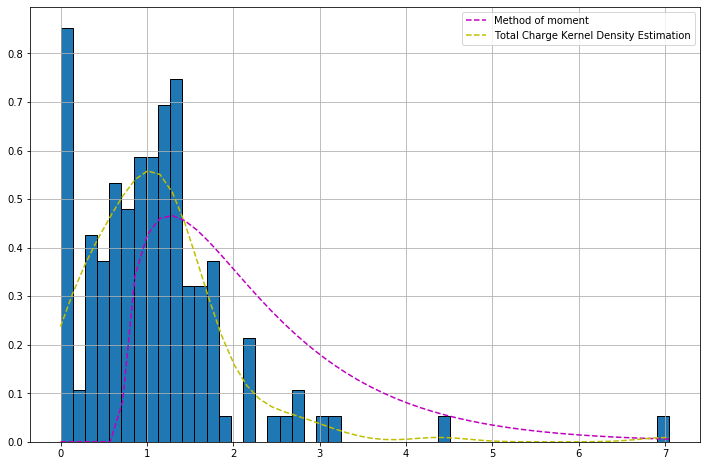

In [24]:
alpha = df["Total Charge"].mean()**2/df["Total Charge"].var()
beta = df["Total Charge"].var()/df["Total Charge"].mean()
x = np.linspace(0,max(df["Total Charge"]))
df["Total Charge"].hist(density=True, bins = 50, ec='black', figsize=(12,8))
density = kde.gaussian_kde(df["Total Charge"], bw_method=None)
legend1, = plt.plot(x, gamma.pdf(x,alpha,beta), "m--", label="Method of moment")
legend3, = plt.plot(np.linspace(0, max(df["Total Charge"])), density(np.linspace(0, max(df["Total Charge"]))), 'y--', label="Total Charge Kernel Density Estimation")
plt.legend(handles=[legend1,legend3])

Confidence Interval

In [76]:
import math as math
mean = df["Total Charge"].mean()
z_critical = stats.norm.ppf(q = 0.975)

std = df["Total Charge"].std()
marginOfError = z_critical * (std/math.sqrt(len(df["Total Charge"])))
confidenceInterval = (mean - marginOfError, mean+marginOfError)
print("Confidence Interval:")
print(confidenceInterval)

Confidence Interval:
(0.8263103074153486, 1.07993605387354)


Hypothesis Testing:

Majority of the podcast cost lies between 0.0 dollar to 1.5 dollar.

H0: The podcast cost is uniformly distributed.

H1: The probability of paying less than 1.5 dollar per podcast is high.